In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [194]:
variable = pd.read_excel("C:\\Users\\DERRY ROMEO\\Downloads\\id.xlsx", usecols="B, C").to_numpy()

In [195]:
class coordinate():
    def __init__(self, longitude, latitude):
        self.longitude, self.latitude = longitude, latitude

In [196]:
class data():
    def __init__(self, xmin, ymin, xmax, ymax, coordinate):
        self.xmin, self.ymin, self.xmax, self.ymax, self.coordinate, self.node = xmin, ymin, xmax, ymax, coordinate, []

In [197]:
class quadtree():
    def __init__(self, variable):
        self.root = data(variable[:,0].min(), variable[:,1].min(), variable[:,0].max(), variable[:,1].max(), 
                        [coordinate(variable[i, 0], variable[i,1]) for i in range(len(variable))])

    def divide(self):
        sub_divide(self.root)

    def drawing_image(self, variable):
        fig = plt.figure(figsize=(50, 25))
        plt.xlim(variable[:,0].min(), variable[:,0].max())
        plt.ylim(variable[:,1].min(), variable[:,1].max())
        plt.title('Quad Tree'), plt.xlabel('Longitude'), plt.ylabel('Latitude')
        plt.scatter([nilai.longitude for nilai in self.root.coordinate], [nilai.latitude for nilai in self.root.coordinate], color = 'red', s = 1)
        for n in check_value(self.root):
            plt.gca().add_patch(plt.Rectangle((n.xmin, n.ymin), n.xmax - n.xmin, n.ymax - n.ymin, ec = 'black', fc = 'none'))
        plt.show()
        return 

def insert(a, b, c, d, root):
    insert_point = []
    for nilai in root.coordinate:
        if (a <= nilai.longitude <= c) and (b <= nilai.latitude <= d):
            insert_point.append(nilai)
    return insert_point

def sub_divide(root):
    if len(root.coordinate) < 2:
       return 

    xmin = root.xmin
    ymin = root.ymin
    xmax = root.xmax
    ymax = root.ymax
    xmid = 0.5*(xmax + xmin)
    ymid = 0.5*(ymax + ymin)

    NE = data(xmid, ymid, xmax, ymax, insert(xmid, ymid, xmax, ymax, root))
    NW = data(xmin, ymid, xmid, ymax, insert(xmin, ymid, xmid, ymax, root))
    SW = data(xmin, ymin, xmid, ymid, insert(xmin, ymin, xmid, ymid, root))
    SE = data(xmid, ymin, xmax, ymid, insert(xmid, ymin, xmax, ymid, root))

    sub_divide(NE)
    sub_divide(NW)
    sub_divide(SW)
    sub_divide(SE)
    
    root.node = [NE, NW, SW, SE]

def check_value(root):
    node = []
    if root.node:
        for child in root.node:
            node += (check_value(child))
    else:
        node += [root]
    return node

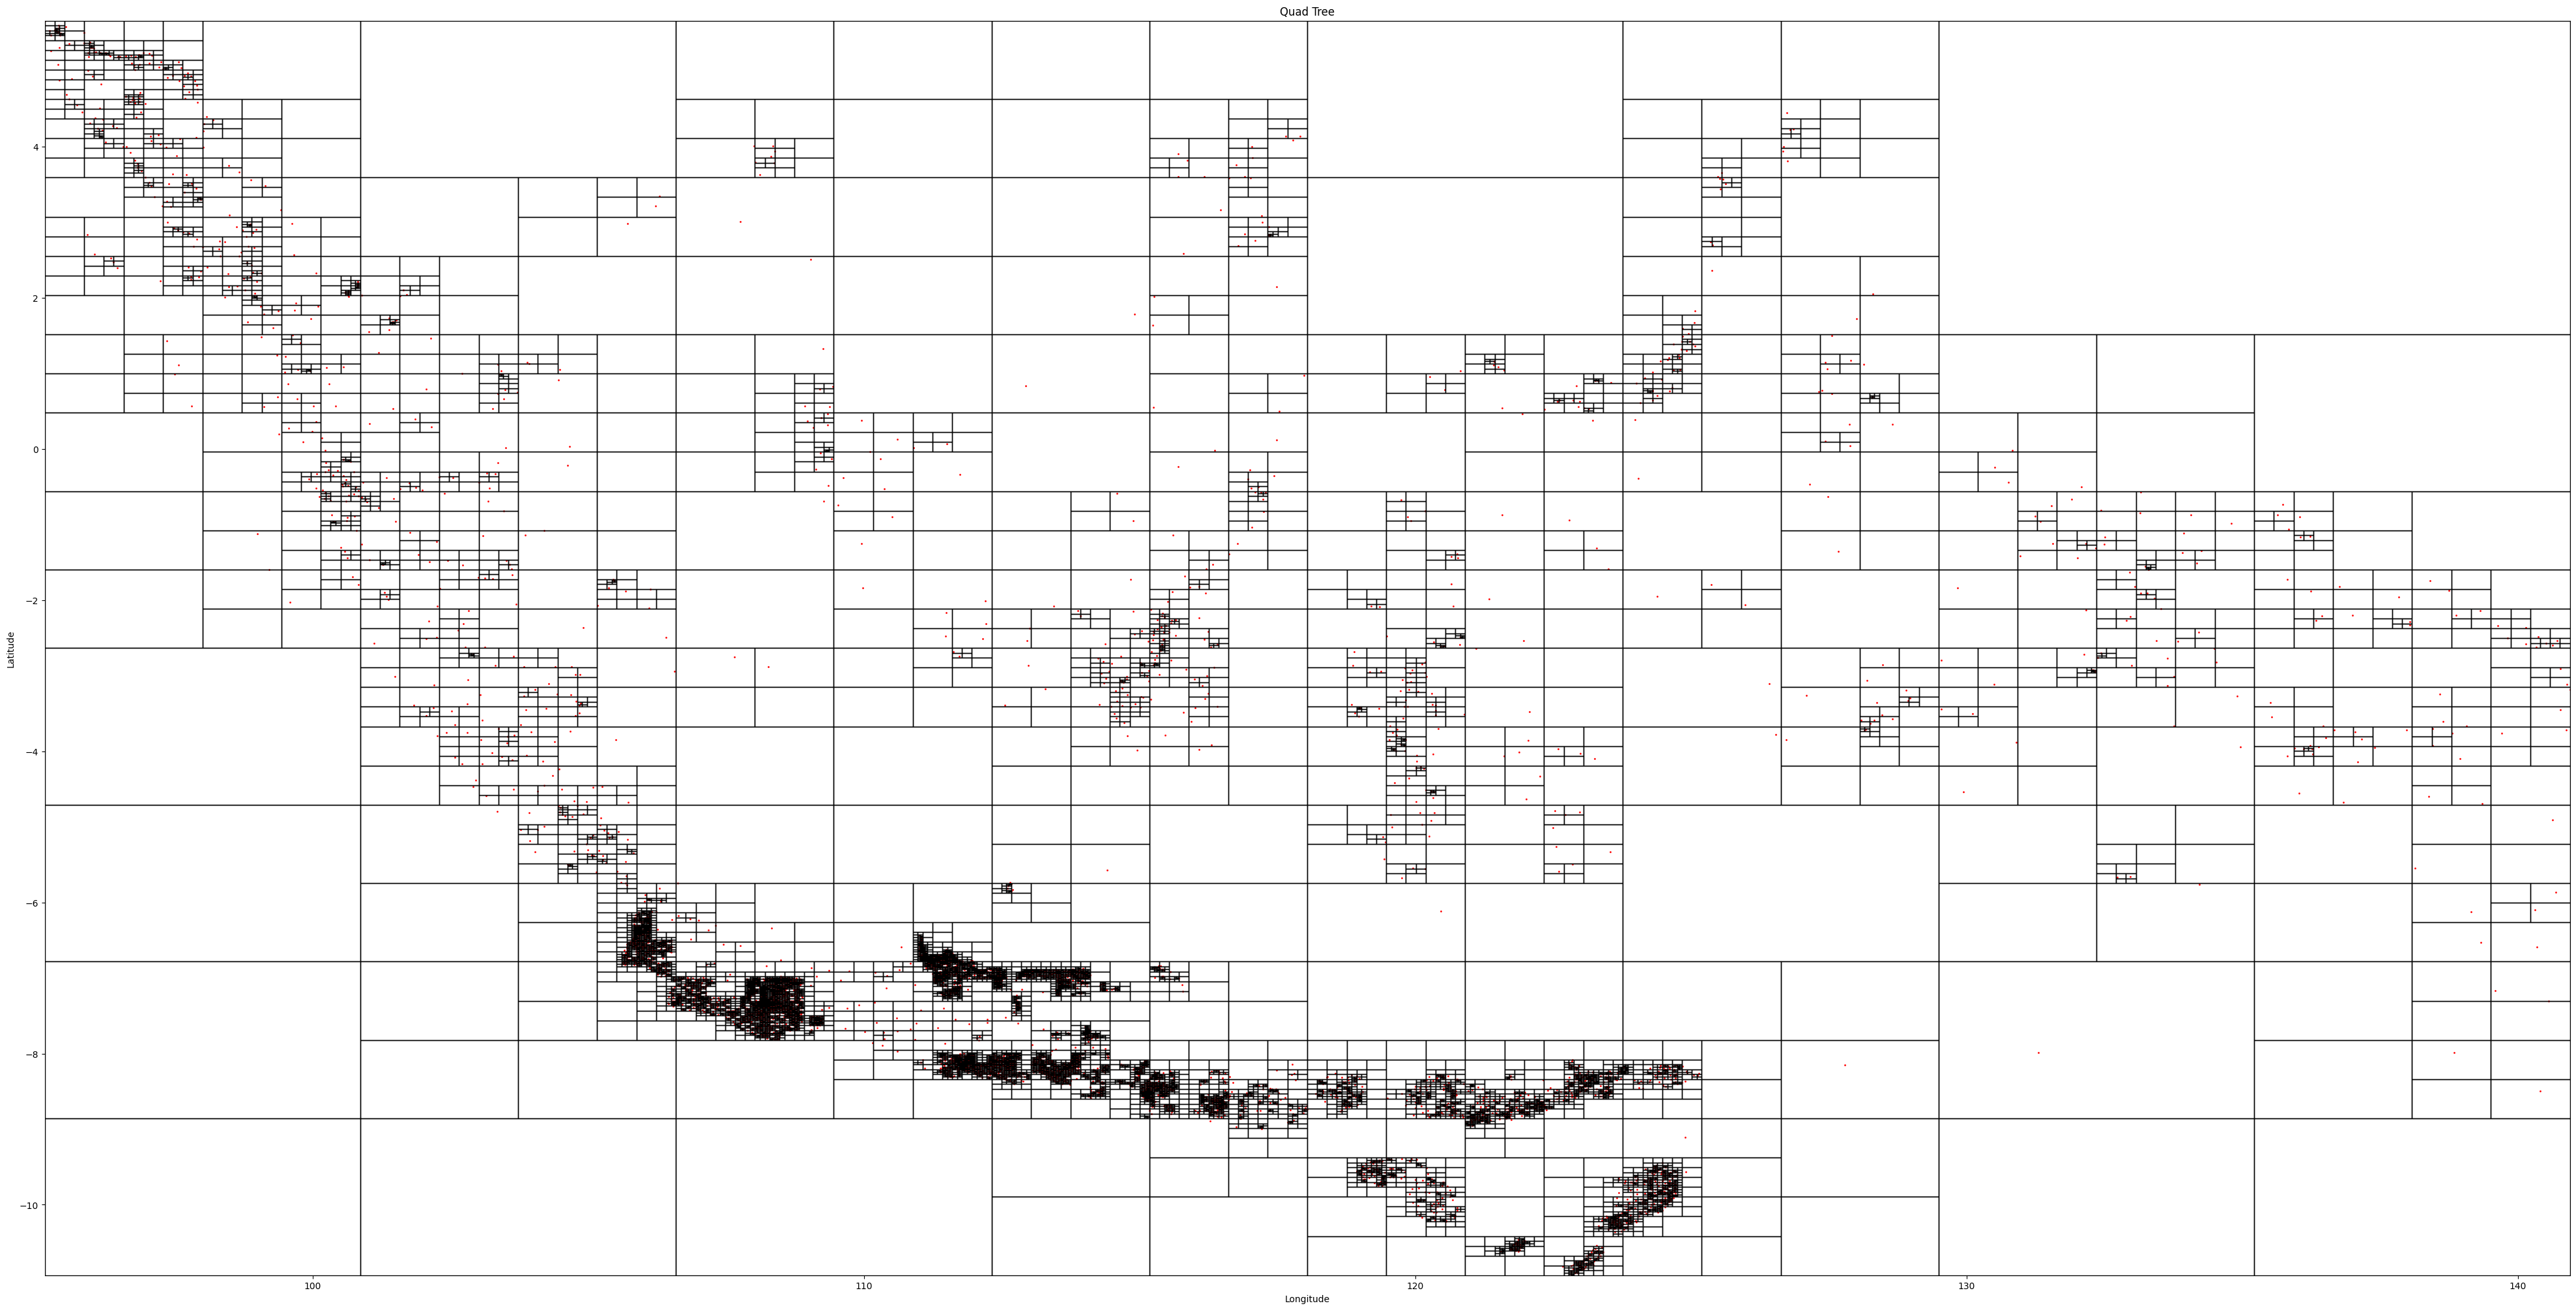

In [198]:
QT = quadtree(variable)
QT.divide()
QT.drawing_image(variable)